In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()

In [2]:
n2v_result_df = pd.concat([
    pd.read_csv('../result/tissue_gene_classification_n2v.csv'),
    pd.read_csv('../result/tissue_gene_classification_n2vplus.csv'),
]).reset_index()

optim_idx_ary = n2v_result_df.groupby(['Network', 'Method', 'Task'])['Validation score'].agg('idxmax').values
result_df = n2v_result_df.iloc[optim_idx_ary]

result_df = pd.concat(
    (
        result_df,
        # Extract tissue corresponding to tasks
        (
            result_df["Task"]
            .str.split("_GO:", expand=True)
            .rename(columns={0: "Task tissue", 1: "Task name"})
        ),
        # Extract tissue corresponding to networks
        (
            result_df["Network"]
            .str.split("-", expand=True)
            .rename(columns={0: "Network name", 1: "Network tissue"})
        ),
    ),
    axis=1,
)

result_df

,index,Training score,Validation score,Testing score,Task,Dataset,Network,Method,p,q,gamma,Task tissue,Task name,Network name,Network tissue
75,75,1.710385,0.500456,-0.159776,blood_GO:0001525,GOBP-tissue,GTExCoExp-blood,Node2vec,10.00,0.01,0.0,blood,0001525,GTExCoExp,blood
51,51,0.664183,1.297728,-0.453840,blood_GO:0001568,GOBP-tissue,GTExCoExp-blood,Node2vec,100.00,0.01,0.0,blood,0001568,GTExCoExp,blood
2,2,0.994730,0.494492,0.499431,blood_GO:0007596,GOBP-tissue,GTExCoExp-blood,Node2vec,0.01,0.01,0.0,blood,0007596,GTExCoExp,blood
78,78,0.501318,1.318092,0.546758,blood_GO:0030098,GOBP-tissue,GTExCoExp-blood,Node2vec,10.00,0.01,0.0,blood,0030098,GTExCoExp,blood
54,54,0.438798,2.731256,0.478076,blood_GO:0030099,GOBP-tissue,GTExCoExp-blood,Node2vec,100.00,0.01,0.0,blood,0030099,GTExCoExp,blood
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14920,12420,1.586804,1.144176,0.282215,muscle_GO:0006937,GOBP-tissue,HumanBaseTop-muscle,Node2vec+,1.00,0.10,1.0,muscle,0006937,HumanBaseTop,muscle
14621,12121,1.219086,2.042036,0.120252,muscle_GO:0016202,GOBP-tissue,HumanBaseTop-muscle,Node2vec+,0.10,1.00,1.0,muscle,0016202,HumanBaseTop,muscle
14622,12122,1.219086,2.042036,0.120252,muscle_GO:0048634,GOBP-tissue,HumanBaseTop-muscle,Node2vec+,0.10,1.00,1.0,muscle,0048634,HumanBaseTop,muscle
14448,11948,2.955725,2.302239,1.035360,muscle_GO:0051147,GOBP-tissue,HumanBaseTop-muscle,Node2vec+,0.01,100.00,1.0,muscle,0051147,HumanBaseTop,muscle


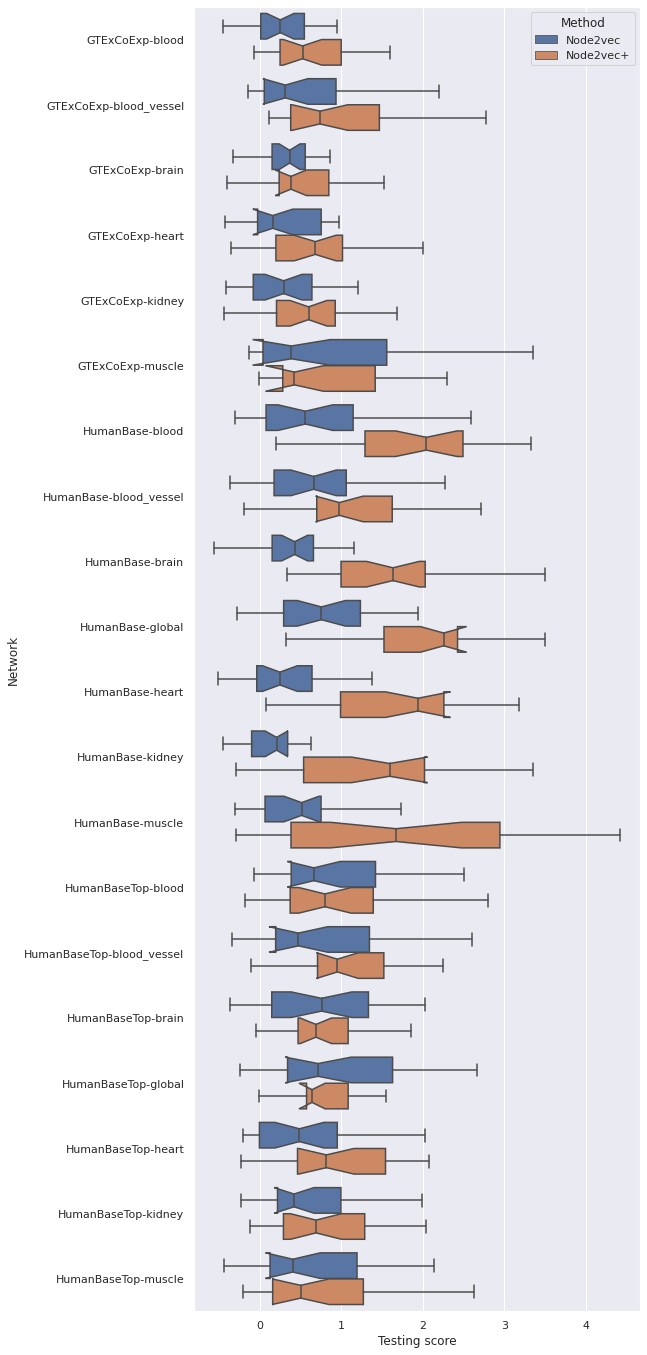

In [3]:
plt.figure(figsize=(8, 24))
sns.boxplot(data=result_df, y="Network", x="Testing score", hue="Method", notch=True, showfliers=False)
plt.show()

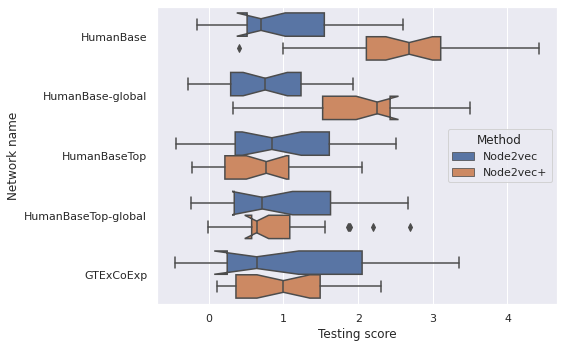

In [4]:
tissue_matched_result_df = pd.concat(
    (
        # Matched tissue
        result_df[result_df["Task tissue"] == result_df["Network tissue"]],
        # Tissue naive (global)
        (
            result_df[result_df["Network"].isin(["HumanBase-global", "HumanBaseTop-global"])]
            .replace({"Network name": "HumanBase"}, "HumanBase-global")
            .replace({"Network name": "HumanBaseTop"}, "HumanBaseTop-global")
        ),
    )
)

plt.figure(figsize=(8, 5))
sns.boxplot(
    data=tissue_matched_result_df,
    y="Network name",
    x="Testing score",
    order=["HumanBase", "HumanBase-global", "HumanBaseTop", "HumanBaseTop-global", "GTExCoExp"],
    hue="Method",
    notch=True,
)
plt.tight_layout()
plt.show()